## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  88.488930  1268.617128  0.402960  1.635052  1.390922
1  94.959043   620.626911  0.191540  1.078290  0.609812
2  12.801039  1200.787110  0.905238  7.368262  1.542192
3  69.325760   767.054322  0.063062  2.842019  0.562591
4   3.327758   872.594219  0.854751  1.946901  1.653154


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0028958	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.9928814	total: 69.5ms	remaining: 34.7s
2:	learn: 0.9818618	total: 70ms	remaining: 23.3s
3:	learn: 0.9723687	total: 70.5ms	remaining: 17.5s
4:	learn: 0.9642150	total: 71ms	remaining: 14.1s
5:	learn: 0.9542591	total: 71.5ms	remaining: 11.8s
6:	learn: 0.9448930	total: 72ms	remaining: 10.2s
7:	learn: 0.9357773	total: 72.5ms	remaining: 8.99s
8:	learn: 0.9275050	total: 72.9ms	remaining: 8.03s
9:	learn: 0.9155340	total: 73.4ms	remaining: 7.26s
10:	learn: 0.9075952	total: 73.8ms	remaining: 6.63s
11:	learn: 0.9003729	total: 74.2ms	remaining: 6.11s
12:	learn: 0.8921660	total: 74.6ms	remaining: 5.67s
13:	learn: 0.8824314	total: 75.2ms	remaining: 5.29s
14:	learn: 0.8707534	total: 75.5ms	remaining: 4.96s
15:	learn: 0.8636578	total: 76.1ms	remaining: 4.68s
16:	learn: 0.8543486	total: 76.5ms	remaining: 4.42s
17:	learn: 0.8477522	total: 76.9ms	remaining: 4.19s
18:	learn: 0.8392293	total: 77.3ms	remaining: 3.99

90:	learn: 0.4448604	total: 108ms	remaining: 1.08s
91:	learn: 0.4417272	total: 109ms	remaining: 1.07s
92:	learn: 0.4394464	total: 109ms	remaining: 1.06s
93:	learn: 0.4364306	total: 109ms	remaining: 1.05s
94:	learn: 0.4335577	total: 110ms	remaining: 1.04s
95:	learn: 0.4299277	total: 110ms	remaining: 1.04s
96:	learn: 0.4272464	total: 111ms	remaining: 1.03s
97:	learn: 0.4247183	total: 111ms	remaining: 1.02s
98:	learn: 0.4230677	total: 111ms	remaining: 1.01s
99:	learn: 0.4196874	total: 113ms	remaining: 1.01s
100:	learn: 0.4165300	total: 113ms	remaining: 1.01s
101:	learn: 0.4145016	total: 114ms	remaining: 1000ms
102:	learn: 0.4113696	total: 114ms	remaining: 992ms
103:	learn: 0.4081414	total: 114ms	remaining: 985ms
104:	learn: 0.4055738	total: 115ms	remaining: 978ms
105:	learn: 0.4016255	total: 115ms	remaining: 970ms
106:	learn: 0.3983581	total: 115ms	remaining: 962ms
107:	learn: 0.3962689	total: 116ms	remaining: 956ms
108:	learn: 0.3932656	total: 116ms	remaining: 949ms
109:	learn: 0.3902505

274:	learn: 0.1707164	total: 186ms	remaining: 491ms
275:	learn: 0.1699813	total: 187ms	remaining: 490ms
276:	learn: 0.1693361	total: 187ms	remaining: 489ms
277:	learn: 0.1686717	total: 188ms	remaining: 487ms
278:	learn: 0.1680379	total: 188ms	remaining: 486ms
279:	learn: 0.1672183	total: 188ms	remaining: 484ms
280:	learn: 0.1664509	total: 189ms	remaining: 483ms
281:	learn: 0.1656185	total: 189ms	remaining: 482ms
282:	learn: 0.1648295	total: 190ms	remaining: 480ms
283:	learn: 0.1641380	total: 190ms	remaining: 479ms
284:	learn: 0.1633879	total: 190ms	remaining: 478ms
285:	learn: 0.1629876	total: 191ms	remaining: 476ms
286:	learn: 0.1622236	total: 191ms	remaining: 475ms
287:	learn: 0.1617973	total: 192ms	remaining: 474ms
288:	learn: 0.1613416	total: 192ms	remaining: 473ms
289:	learn: 0.1609466	total: 192ms	remaining: 471ms
290:	learn: 0.1605515	total: 193ms	remaining: 470ms
291:	learn: 0.1598734	total: 193ms	remaining: 469ms
292:	learn: 0.1594471	total: 194ms	remaining: 468ms
293:	learn: 

507:	learn: 0.0851738	total: 290ms	remaining: 281ms
508:	learn: 0.0850678	total: 291ms	remaining: 281ms
509:	learn: 0.0849674	total: 291ms	remaining: 280ms
510:	learn: 0.0846783	total: 292ms	remaining: 279ms
511:	learn: 0.0845810	total: 292ms	remaining: 279ms
512:	learn: 0.0845111	total: 293ms	remaining: 278ms
513:	learn: 0.0841733	total: 293ms	remaining: 277ms
514:	learn: 0.0840768	total: 294ms	remaining: 276ms
515:	learn: 0.0837929	total: 294ms	remaining: 276ms
516:	learn: 0.0836995	total: 295ms	remaining: 275ms
517:	learn: 0.0833546	total: 295ms	remaining: 275ms
518:	learn: 0.0832635	total: 296ms	remaining: 274ms
519:	learn: 0.0830318	total: 296ms	remaining: 273ms
520:	learn: 0.0828051	total: 296ms	remaining: 272ms
521:	learn: 0.0826648	total: 297ms	remaining: 272ms
522:	learn: 0.0825577	total: 297ms	remaining: 271ms
523:	learn: 0.0822704	total: 298ms	remaining: 270ms
524:	learn: 0.0822052	total: 298ms	remaining: 270ms
525:	learn: 0.0819313	total: 299ms	remaining: 269ms
526:	learn: 

689:	learn: 0.0543161	total: 368ms	remaining: 166ms
690:	learn: 0.0542471	total: 369ms	remaining: 165ms
691:	learn: 0.0538869	total: 369ms	remaining: 164ms
692:	learn: 0.0538359	total: 370ms	remaining: 164ms
693:	learn: 0.0537369	total: 370ms	remaining: 163ms
694:	learn: 0.0536397	total: 370ms	remaining: 163ms
695:	learn: 0.0535893	total: 371ms	remaining: 162ms
696:	learn: 0.0533221	total: 371ms	remaining: 161ms
697:	learn: 0.0531749	total: 372ms	remaining: 161ms
698:	learn: 0.0528258	total: 372ms	remaining: 160ms
699:	learn: 0.0525653	total: 372ms	remaining: 160ms
700:	learn: 0.0522242	total: 373ms	remaining: 159ms
701:	learn: 0.0521756	total: 373ms	remaining: 158ms
702:	learn: 0.0519127	total: 373ms	remaining: 158ms
703:	learn: 0.0516767	total: 374ms	remaining: 157ms
704:	learn: 0.0515848	total: 374ms	remaining: 157ms
705:	learn: 0.0513426	total: 375ms	remaining: 156ms
706:	learn: 0.0511920	total: 375ms	remaining: 155ms
707:	learn: 0.0511422	total: 375ms	remaining: 155ms
708:	learn: 

935:	learn: 0.0294268	total: 473ms	remaining: 32.3ms
936:	learn: 0.0293094	total: 473ms	remaining: 31.8ms
937:	learn: 0.0292103	total: 473ms	remaining: 31.3ms
938:	learn: 0.0291003	total: 474ms	remaining: 30.8ms
939:	learn: 0.0289997	total: 474ms	remaining: 30.3ms
940:	learn: 0.0289056	total: 475ms	remaining: 29.8ms
941:	learn: 0.0287911	total: 475ms	remaining: 29.3ms
942:	learn: 0.0286879	total: 476ms	remaining: 28.8ms
943:	learn: 0.0285883	total: 476ms	remaining: 28.2ms
944:	learn: 0.0284776	total: 476ms	remaining: 27.7ms
945:	learn: 0.0283663	total: 477ms	remaining: 27.2ms
946:	learn: 0.0282583	total: 477ms	remaining: 26.7ms
947:	learn: 0.0281641	total: 478ms	remaining: 26.2ms
948:	learn: 0.0280438	total: 478ms	remaining: 25.7ms
949:	learn: 0.0279458	total: 478ms	remaining: 25.2ms
950:	learn: 0.0278640	total: 479ms	remaining: 24.7ms
951:	learn: 0.0277753	total: 479ms	remaining: 24.2ms
952:	learn: 0.0276955	total: 479ms	remaining: 23.6ms
953:	learn: 0.0276085	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

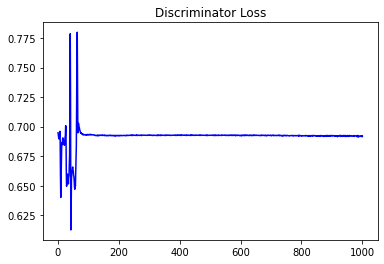

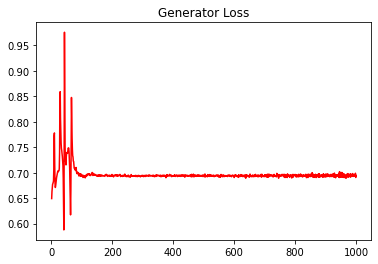

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.29648549650884304


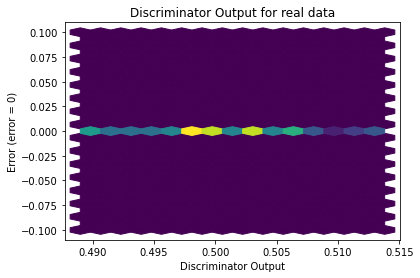

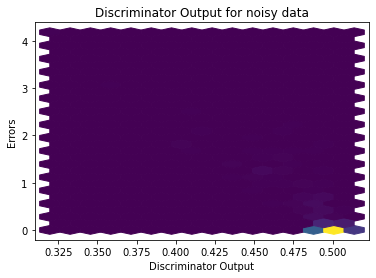

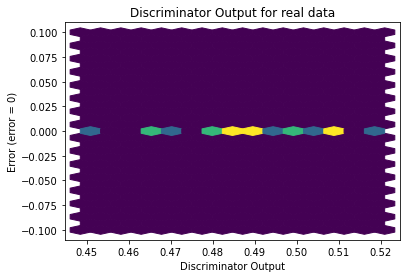

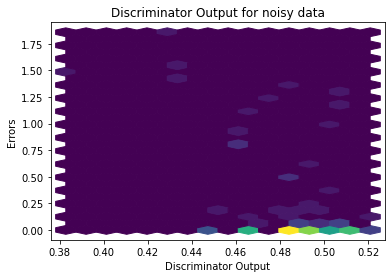

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


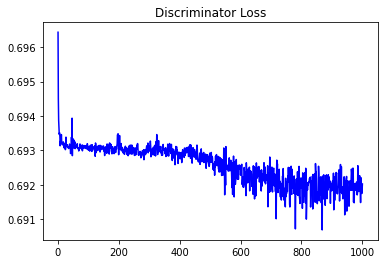

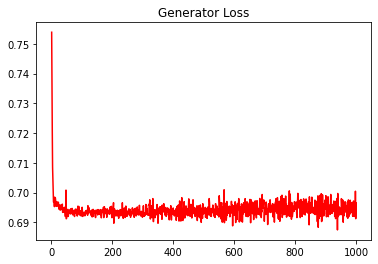

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2863583559016826


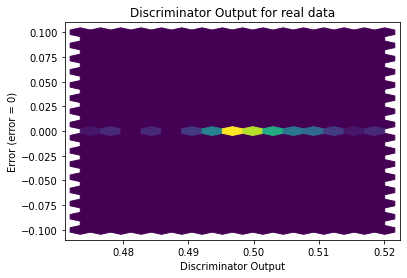

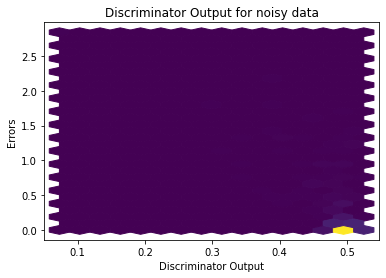

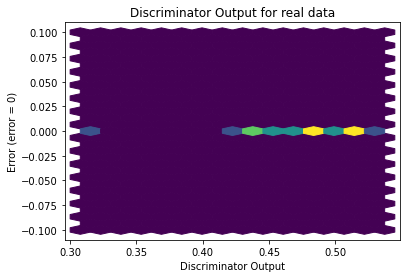

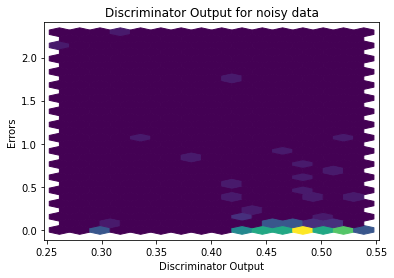

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1626]], requires_grad=True)
